# Plantilla de Definición de Proyecto GRD

Complete claramente cada sección en grupo, proporcionando justificaciones detalladas y coherentes con los objetivos del curso y el contexto del sistema de salud chileno (GRD).

## 1. Integrantes del grupo


- Estudiante 1: Vicente Fuentes (Experto en analisis estadistico)
- Estudiante 2: Darienn López (Experto en crear visualizaciones de datos)
- Estudiante 3: Tomás Solano (Experto en programación)

## 2. Título tentativo del proyecto

#### Las consecuecias de la centralización de la salud chilena y como afecta a su calidad demográficamente.

## 3. Declaración del problema desde el usuario

La población chilena necesita tener salud de calidad al alcance de su región debido a que gran parte de los implementos y profesionales de alta calidad se encuentran en la región metropolitana, lo que provoca que la gente deba hacer viajes costosos a esta.


## 4. Pregunta principal de investigación

¿Cómo afecta la centralización de la salud a la población chilena?

## 5. Preguntas secundarias (mínimo 2)

- Pregunta secundaria 1: ¿Cómo varia el tiempo de estancia entre la región metropolitana y el resto de regiones?
- Pregunta secundaria 2: ¿Cómo afecta la centralización en la calidad de los centros de salud con respecto a la mortalidad?
- (Opcional) Pregunta secundaria 3: ¿El peso GRD es varia dependiendo de la localidad del centro de salud?

## 6. Variables principales y justificación de selección

Variable 1: Servicios de Salud - Justificación: Analizaremos los datos según la región, por lo que este dato es clave.

Variable 2: Mortalidad - Justificación: Conocer la mortalidad según el centro de salud es clave para un correcto análisis.

Variable 3: Peso GRD - Justificación: Podemos analizar variables que sean iguales en diversos centros de salud para realizar comparativas en el estudio.

Variable 4: Tiempo Estancia - Justificación: Nos dirá como varian los tiempos de recuperación de un paciente promedio en un mismo GRD en distintos servicios de salud.


## 7. Metodología estadística propuesta

- Método 1: Estadística Descriptiva - Propósito: Analizar y comparar la calidad y eficiencia de los distintos centros de salud en el país, permitiendo distribuir los datos en categorías y entregar información relevante y de calidad.
- Método 2: Estadística Inferencial - Propósito: El estudio que estamos realizando nos entregará muchos datos, los cuales deben de ser analizados con detenimiento para poder obtener conclusiones acordes al caso, tendiendo en cuenta la situación actual de las regiones.

## 8. Potencial impacto y aplicación práctica

Nuestra investigación hará visible la situación actual y la brecha de calidad de atención en las regiones de Chile, ya que la situación implica un gran gasto por la población chilena para tener una atención de salud de buena calidad. También, entregará información importante que permita tomar acciones ante esta situación y hacer las atenciones de salud de calidad accesibles para la población chilena a lo largo de todas las regiones del país.

## 9. Supuestos estadísticos necesarios

Supuesto 1: Los códigos GRDs son únicos e iguales para todos los servicios - Forma de validación: Está dirigido por una norma.

Supuesto 2: La población, y por ende, las muestras obtenibles de la región metropolitana son más que las muestras disponibles por región - Forma de validación: Población por región de estudio.

## 10. Limitaciones del estudio

Limitación 1: Dificultad de obtención de información de ciertos grupos, como son los hombres de 20 a 50 años, los cuales tienden a omitir la atención médica - Estrategia de mitigación: Se buscará una distribución que se adapte a los datos actuales para inferir y predecir el comportamiento de estos grupos.

Limitación 2: Los servicios de salud en otras regiones se generalizan por región, mientras que en la región metropolitana existen por distrito - Estrategia de mitigación: Obtener un promedio para la región metropolitana con el fin de obtener una generalización de la misma.

## 11. Cronograma detallado del proyecto
Defina claramente las actividades que realizarán en cada bloque de semanas según el calendario del curso.
- Semanas 4-5: Análisis inicial y filtración de datos.
- Semanas 6-7: Revisión de datos obtenidos y creación visualizaciones iniciales.
- Semanas 8-9: Obtención de conclusiones del estudio y comienzo de la escritura del informe.
- Semanas 10-11: Revisión de las conclusiones y finalización del informe.
- Semana 12 (preparación final): Creación de la presentación de los datos y análisis para el exámen.

In [197]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
import polars as pl


In [198]:
archivo_csv = "GRD_PUBLICO_2023.csv"
df = pd.read_csv(archivo_csv, sep='|', on_bad_lines='skip', engine='python', encoding='utf-16')
print(f"Datos cargados exitosamente: {df.shape[0]:,} registros")
df = df[["SEXO", "FECHA_NACIMIENTO", "PROVINCIA", "PREVISION", "SERVICIO_SALUD", "IR_29301_PESO", "TIPO_INGRESO", "ESPECIALIDAD_MEDICA", "IR_29301_COD_GRD", "FECHA_INGRESO", "FECHAALTA", "PROCEDIMIENTO1"]]
display(df.head(5))

Datos cargados exitosamente: 1,039,587 registros


,SEXO,FECHA_NACIMIENTO,PROVINCIA,PREVISION,SERVICIO_SALUD,IR_29301_PESO,TIPO_INGRESO,ESPECIALIDAD_MEDICA,IR_29301_COD_GRD,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1
0,HOMBRE,1980-04-13,VALDIVIA,FONASA INSTITUCIONAL - (MAI) A,VALDIVIA,"0,7094",URGENCIA,CIRUGÍA GENERAL,064161,12-03-2023,14-03-2023,87.03
1,HOMBRE,2001-11-04,CORDILLERA,PARTICULAR,METROPOLITANO SURORIENTE,"1,0869",URGENCIA,CIRUGÍA GENERAL,041301,04-11-2023,10-11-2023,32.20
2,HOMBRE,2020-07-30,CORDILLERA,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,"0,4084",URGENCIA,PEDIATRÍA,044161,07-06-2023,08-06-2023,93.96
3,MUJER,1978-11-14,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,"0,6406",PROGRAMADA,OBSTETRICIA Y GINECOLOGÍA,131301,25-05-2023,26-05-2023,59.79
4,MUJER,2023-12-20,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,"0,5346",URGENCIA,NEONATOLOGÍA,074131,28-12-2023,30-12-2023,99.83


In [199]:

valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"

    elif "ARAUCANÍA" in i: 
        diccionario[i] = "ARAUCANÍA"

    elif "VIÑA" in i or "VALPARAISO" in i or "ACONCAGUA" in i: 
        diccionario[i] = "VALPARAISO"

    elif "VALDIVIA" in i:
        diccionario[i] = "RIOS"

    elif "RELONCAVÍ" in i or "OSORNO" in i or "CHILOÉ" in i:
        diccionario[i] = "LAGOS"

    elif "TALCAHUANO" in i or "CONCEPCIÓN" in i or "BIOBIO" in i or "ARAUCO" in i:
        diccionario[i] = "BIOBIO"

    elif "IQUIQUE" in i:
        diccionario[i] = "TARAPACA"

    else:
        diccionario[i] = i
        
diccionario

df["REGION"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[(df["REGION"] != "DESCONOCIDO") & (df["IR_29301_PESO"] != "DESCONOCIDO")]

### 1.2. Limpieza datos

In [200]:
def Convert_To_Point(data):
    new_data = []
    for num in data:
        new_num = []
        for char in num:
            new_num.append(char) if char != "," else new_num.append(".")
        
        new_data.append(float(''.join(new_num)))

    return new_data

df["IR_29301_PESO"] = Convert_To_Point(df["IR_29301_PESO"])    

peso_grd = peso_grd_con_outliers = df["IR_29301_PESO"]
peso_grd_3_quantile = np.percentile(peso_grd, 75)

peso_grd_1_quantile = np.percentile(peso_grd, 25)

IQR = peso_grd_3_quantile - peso_grd_1_quantile

limite_inferior = peso_grd_1_quantile - 1.5 * IQR
limite_superior = peso_grd_3_quantile + 1.5 * IQR

df = df.loc[(peso_grd >= limite_inferior) & (peso_grd <= limite_superior)]

df = df[(df["FECHA_NACIMIENTO"] != "DESCONOCIDO") & (df["FECHA_INGRESO"] != "DESCONOCIDO") & (df["FECHAALTA"] != "DESCONOCIDO") & (df["PROCEDIMIENTO1"] != "DESCONOCIDO")]

df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'], dayfirst=True)
df['FECHAALTA'] = pd.to_datetime(df['FECHAALTA'], dayfirst=True)

# Calculamos la edad del paciente y la duración de la estancia
df['EDAD'] = ((df['FECHA_INGRESO'] - df['FECHA_NACIMIENTO']).dt.days / 365.25).round().astype('Int64')
df['DIAS_ESTANCIA'] = (df['FECHAALTA'] - df['FECHA_INGRESO']).dt.days

C:\Users\TomyS\AppData\Local\Temp\ipykernel_10172\2596872186.py:28: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['FECHA_NACIMIENTO'] = pd.to_datetime(df['FECHA_NACIMIENTO'], dayfirst=True)


###

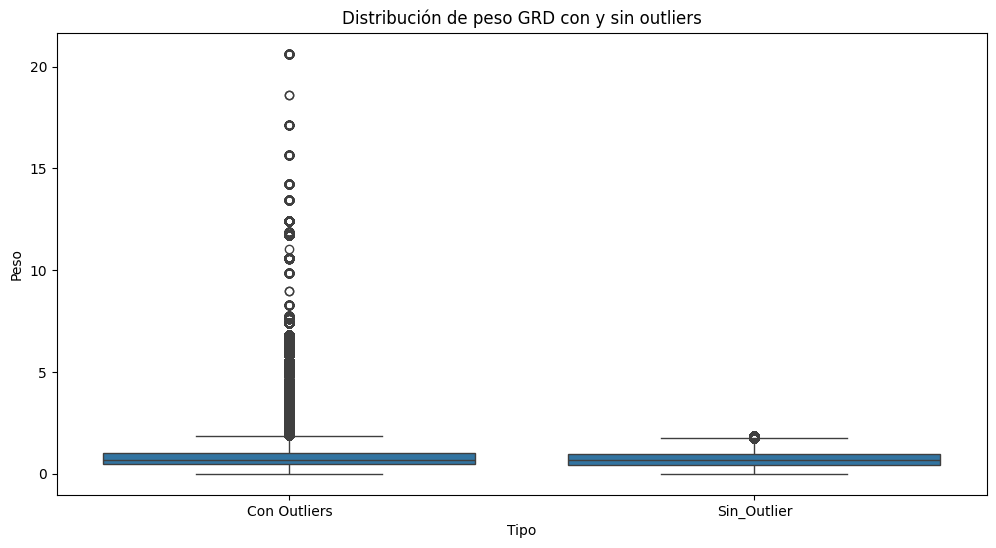

In [201]:
peso_sin_outliers = df["IR_29301_PESO"]
tipo = ["Con Outliers"] * len(peso_grd_con_outliers) + ["Sin_Outlier"] * len(peso_sin_outliers)
pesos = peso_grd_con_outliers.to_list() + peso_sin_outliers.to_list()

df_peso_comp = pd.DataFrame({
    "Tipo" : tipo,
    "Peso" : pesos
})

plt.figure(figsize = (12,6))
plt.title("Distribución de peso GRD con y sin outliers")
sns.boxplot(data = df_peso_comp, x = "Tipo", y = "Peso")
plt.show()

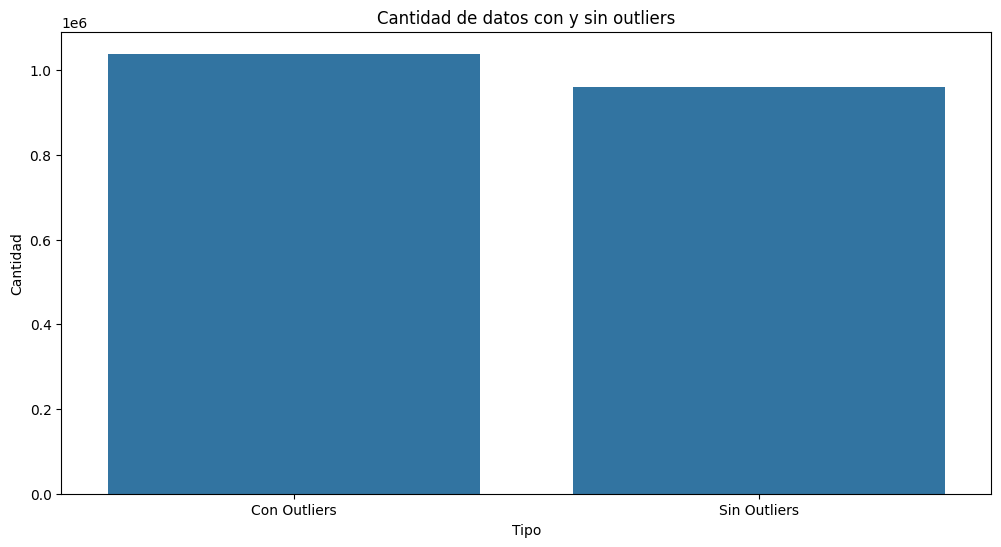

In [202]:
df_peso_comp = pd.DataFrame({
    "Tipo" : ["Con Outliers", "Sin Outliers"],
    "Cantidad" : [len(peso_grd_con_outliers), len(peso_sin_outliers)]
})

plt.figure(figsize = (12,6))
plt.title("Cantidad de datos con y sin outliers")
sns.barplot(data = df_peso_comp, x = "Tipo", y = "Cantidad")
plt.show()

### 1.3. Intervalo de confianza

In [203]:
datos = []
regiones = df["REGION"].unique()

confianza = 0.95

for i in regiones:
    dato_region = df[df["REGION"] == i]
    
    peso_grd = dato_region["IR_29301_PESO"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "REGION" : i,
        "PROMEDIO PESO_GRD" : promedio,
        "DESV ESTANDAR PESO_GRD" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO PESO_GRD", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")

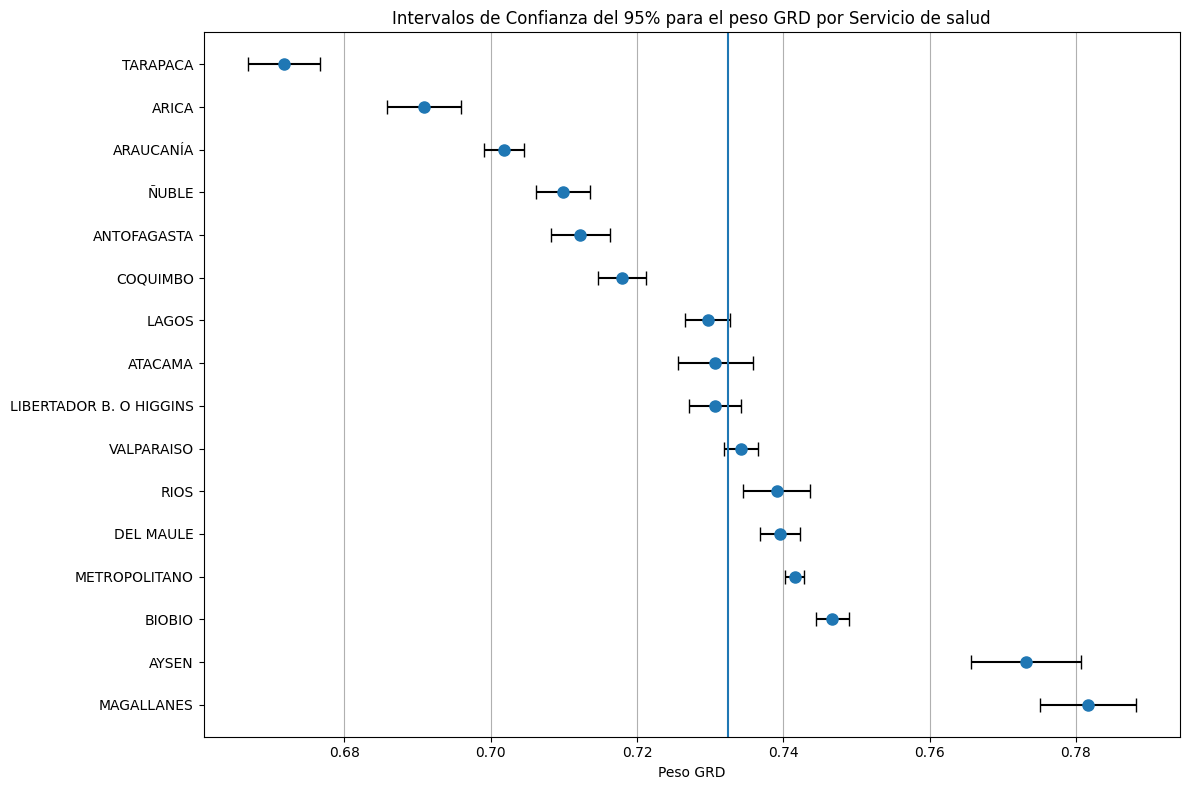

El promedio grd es: 0.7324245200211994


In [204]:
promedio = np.mean(df["IR_29301_PESO"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO PESO_GRD'], calculos.index,
    xerr=[calculos['PROMEDIO PESO_GRD'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO PESO_GRD']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['REGION'])
plt.xlabel('Peso GRD')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para el peso GRD por Servicio de salud')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(f"El promedio grd es: {promedio}")

### Medimos cantidad de datos por región

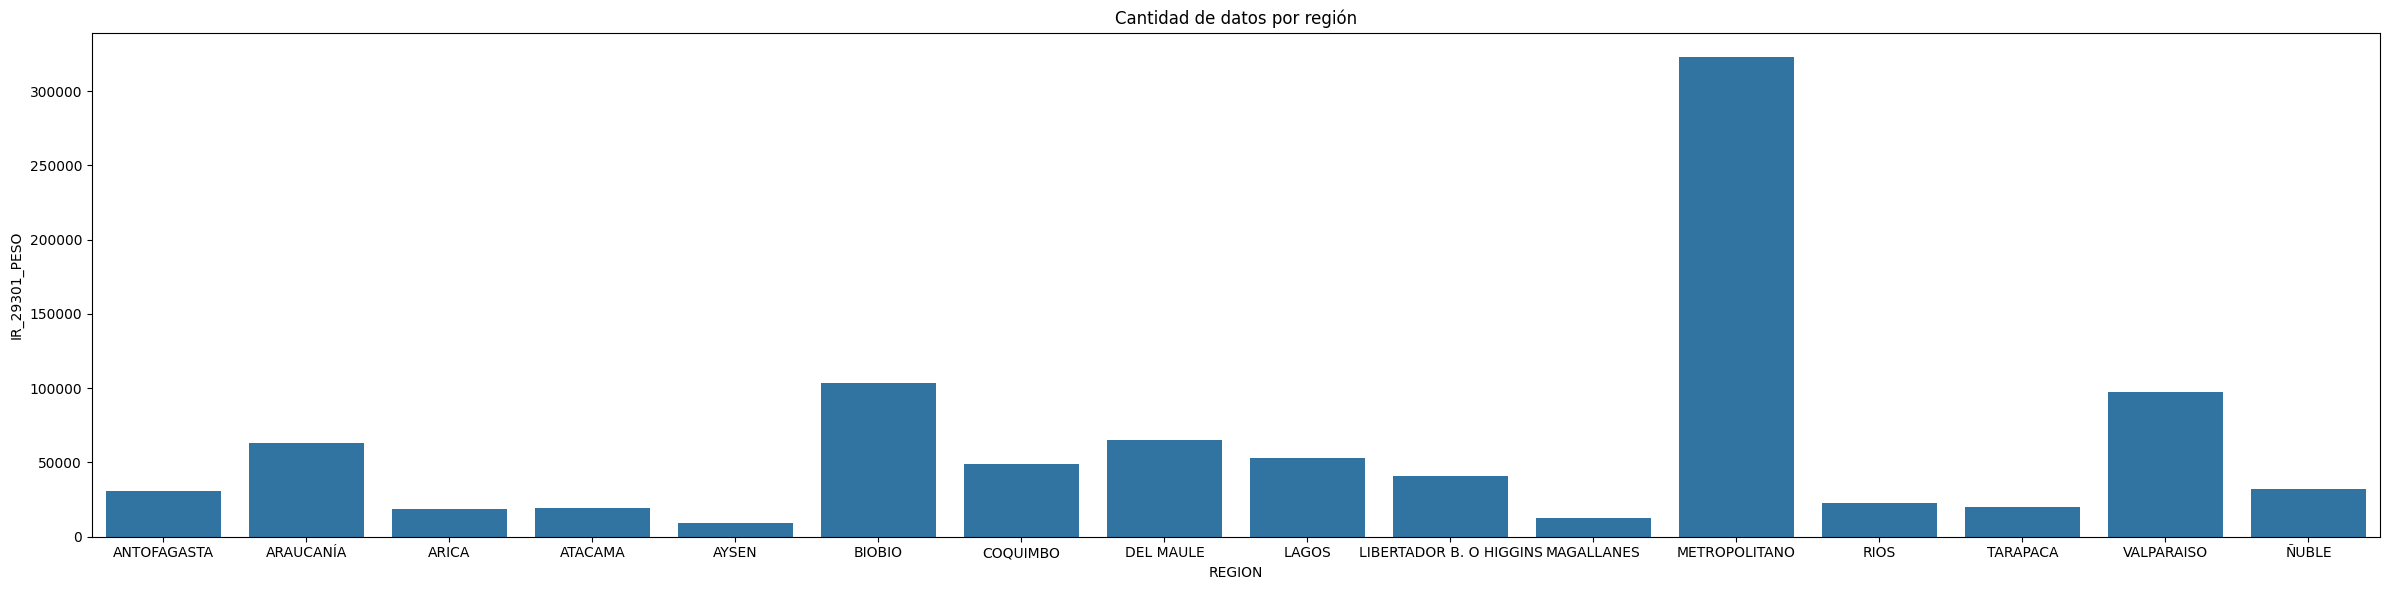

In [205]:
df_agrupado_por_region = df.groupby("REGION").agg(
    {
        "IR_29301_PESO" : "count"
    }
).reset_index()

plt.figure(figsize = (24,6))
sns.barplot(df_agrupado_por_region, x = "REGION", y = "IR_29301_PESO")
plt.title("Cantidad de datos por región")
plt.tight_layout()
plt.show()

## Observamos entre metropolitano y región

In [206]:
df["ES_METROPOLITANO"] = df["REGION"].isin(["METROPOLITANO"])

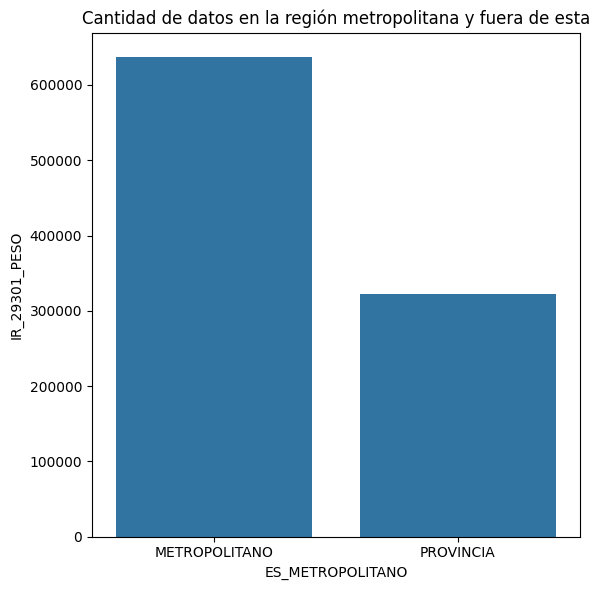

In [218]:
df_agrupado_por_metropolitano= df.groupby("ES_METROPOLITANO").agg(
    {
        "IR_29301_PESO" : "count"
    }
).reset_index()

plt.figure(figsize = (6,6))
sns.barplot(df_agrupado_por_metropolitano, x = "ES_METROPOLITANO", y = "IR_29301_PESO")
plt.xticks([0, 1], ["METROPOLITANO", "PROVINCIA"])
plt.title("Cantidad de datos en la región metropolitana y fuera de esta")
plt.tight_layout()
plt.show()

In [208]:
regiones_altamente_pobladas = df_agrupado_por_region[df_agrupado_por_region["IR_29301_PESO"] >= 50000]

df_regiones_altamente_pobladas = df[df["REGION"].isin(regiones_altamente_pobladas["REGION"])]

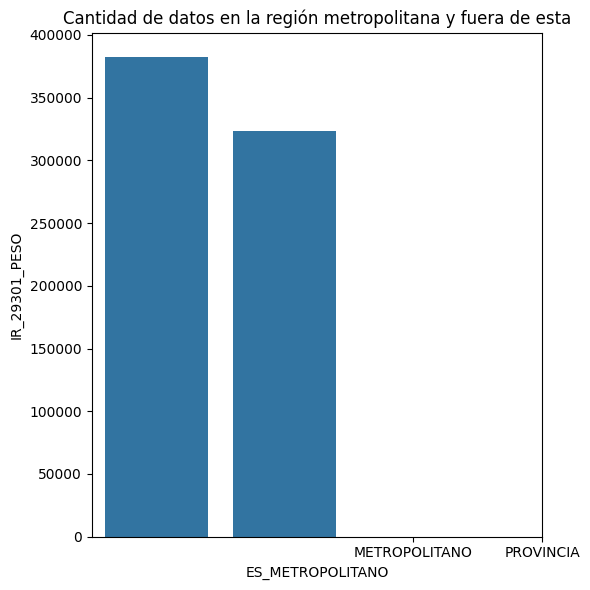

In [209]:
df_regiones_altamente_pobladas_grouped = df_regiones_altamente_pobladas.groupby("ES_METROPOLITANO").agg(
    {
        "IR_29301_PESO" : "count"
    }
).reset_index()

plt.figure(figsize = (6,6))
sns.barplot(df_regiones_altamente_pobladas_grouped, x = "ES_METROPOLITANO", y = "IR_29301_PESO")
plt.xticks(["METROPOLITANO", "PROVINCIA"])
plt.title("Cantidad de datos en la región metropolitana y fuera de esta")
plt.tight_layout()
plt.show()

## Pasamos los booleanos a false y true

In [210]:
df_regiones_altamente_pobladas["ES_METROPOLITANO"] = df["REGION"].isin(["METROPOLITANO"]).astype(int)

df_regiones_altamente_pobladas

C:\Users\TomyS\AppData\Local\Temp\ipykernel_10172\2504103819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiones_altamente_pobladas["ES_METROPOLITANO"] = df["REGION"].isin(["METROPOLITANO"]).astype(int)


,SEXO,FECHA_NACIMIENTO,PROVINCIA,PREVISION,SERVICIO_SALUD,IR_29301_PESO,TIPO_INGRESO,ESPECIALIDAD_MEDICA,IR_29301_COD_GRD,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1,REGION,EDAD,DIAS_ESTANCIA,ES_METROPOLITANO
1,HOMBRE,2001-11-04,CORDILLERA,PARTICULAR,METROPOLITANO SURORIENTE,1.0869,URGENCIA,CIRUGÍA GENERAL,041301,2023-11-04,2023-11-10,32.20,METROPOLITANO,22,6,1
2,HOMBRE,2020-07-30,CORDILLERA,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,0.4084,URGENCIA,PEDIATRÍA,044161,2023-06-07,2023-06-08,93.96,METROPOLITANO,3,1,1
3,MUJER,1978-11-14,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,0.6406,PROGRAMADA,OBSTETRICIA Y GINECOLOGÍA,131301,2023-05-25,2023-05-26,59.79,VALPARAISO,45,1,0
4,MUJER,2023-12-20,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,0.5346,URGENCIA,NEONATOLOGÍA,074131,2023-12-28,2023-12-30,99.83,VALPARAISO,0,2,0
5,MUJER,1964-12-20,LOS ANDES,FONASA INSTITUCIONAL - (MAI) C,ACONCAGUA,0.1032,PROGRAMADA,NEUROCIRUGÍA,083110,2023-04-24,2023-04-24,81.92,VALPARAISO,58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039580,HOMBRE,1949-07-30,TALCA,FONASA INSTITUCIONAL - (MAI) C,DEL MAULE,0.4384,PROGRAMADA,OFTALMOLOGÍA,022360,2023-11-01,2023-11-01,13.41,DEL MAULE,74,0,0
1039581,HOMBRE,1942-03-23,SANTIAGO,FONASA INSTITUCIONAL - (MAI) B,METROPOLITANO SURORIENTE,0.4384,PROGRAMADA,OFTALMOLOGÍA,022360,2023-01-25,2023-01-25,13.41,METROPOLITANO,81,0,1
1039583,MUJER,1991-04-26,CONCEPCION,FONASA INSTITUCIONAL - (MAI) D,CONCEPCIÓN,0.1761,PROGRAMADA,OBSTETRICIA Y GINECOLOGÍA,132340,2023-06-14,2023-06-14,67.32,BIOBIO,32,0,0
1039585,HOMBRE,2014-01-07,OSORNO,FONASA INSTITUCIONAL - (MAI) A,OSORNO,0.3452,PROGRAMADA,PEDIATRÍA,044181,2023-03-28,2023-03-28,99.28,LAGOS,9,0,0


## Obtenemos PSM

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 2. Seleccionar variables para matching (covariables)
X = df_regiones_altamente_pobladas[['EDAD', 'TIPO_INGRESO', 'IR_29301_PESO']]
# Convertir variables categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['TIPO_INGRESO'], drop_first=True)
y = df_regiones_altamente_pobladas['ES_METROPOLITANO']

# Eliminar filas con valores faltantes en X o y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# 3. Estandarizar variables numéricas para mejorar el ajuste del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Ajustar modelo de regresión logística para calcular propensity scores
# El modelo predice la probabilidad de pertenecer al grupo "tratamiento" según las covariables
modelo_ps = LogisticRegression(random_state=42)
modelo_ps.fit(X_scaled, y)
# Guardamos el propensity score en el DataFrame original
df_regiones_altamente_pobladas.loc[X.index, 'propensity_score'] = modelo_ps.predict_proba(X_scaled)[:, 1]

df_regiones_altamente_pobladas.head(5)

C:\Users\TomyS\AppData\Local\Temp\ipykernel_10172\4165663919.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiones_altamente_pobladas.loc[X.index, 'propensity_score'] = modelo_ps.predict_proba(X_scaled)[:, 1]


,SEXO,FECHA_NACIMIENTO,PROVINCIA,PREVISION,SERVICIO_SALUD,IR_29301_PESO,TIPO_INGRESO,ESPECIALIDAD_MEDICA,IR_29301_COD_GRD,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1,REGION,EDAD,DIAS_ESTANCIA,ES_METROPOLITANO,propensity_score
1,HOMBRE,2001-11-04,CORDILLERA,PARTICULAR,METROPOLITANO SURORIENTE,1.0869,URGENCIA,CIRUGÍA GENERAL,041301,2023-11-04,2023-11-10,32.20,METROPOLITANO,22,6,1,0.479084
2,HOMBRE,2020-07-30,CORDILLERA,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,0.4084,URGENCIA,PEDIATRÍA,044161,2023-06-07,2023-06-08,93.96,METROPOLITANO,3,1,1,0.467447
3,MUJER,1978-11-14,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,0.6406,PROGRAMADA,OBSTETRICIA Y GINECOLOGÍA,131301,2023-05-25,2023-05-26,59.79,VALPARAISO,45,1,0,0.450006
4,MUJER,2023-12-20,SAN ANTONIO,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,0.5346,URGENCIA,NEONATOLOGÍA,074131,2023-12-28,2023-12-30,99.83,VALPARAISO,0,2,0,0.473016
5,MUJER,1964-12-20,LOS ANDES,FONASA INSTITUCIONAL - (MAI) C,ACONCAGUA,0.1032,PROGRAMADA,NEUROCIRUGÍA,083110,2023-04-24,2023-04-24,81.92,VALPARAISO,58,0,0,0.426463


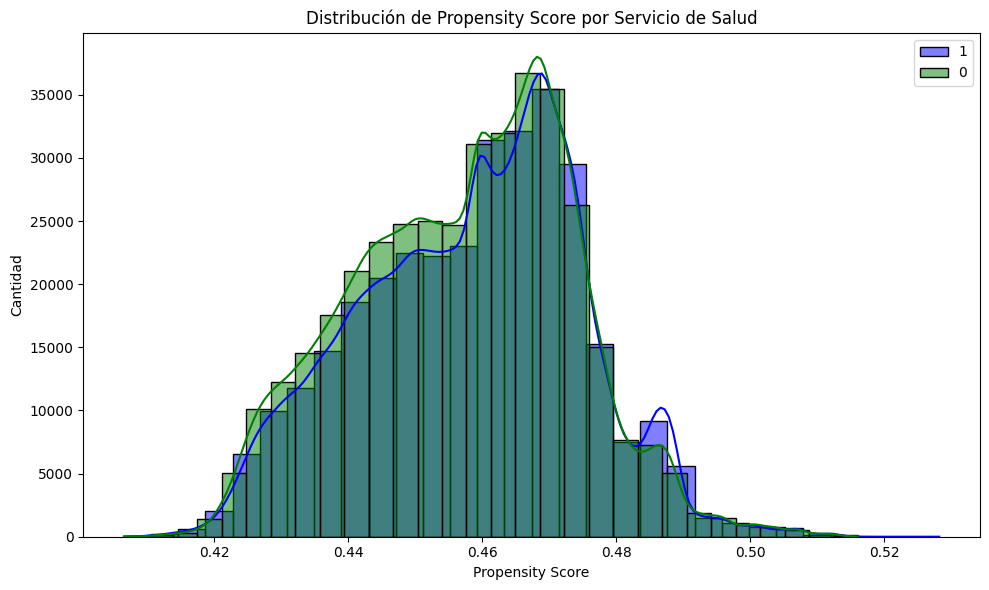

In [212]:
plt.figure(figsize=(10, 6))

es_metropolitano = [1, 0]

for es_servicio_metropolitano, color in zip(es_metropolitano, ['blue', 'green']):
    subset = df_regiones_altamente_pobladas[df_regiones_altamente_pobladas['ES_METROPOLITANO'] == es_servicio_metropolitano]
    sns.histplot(subset['propensity_score'], kde=True, bins=30, color=color, label=es_servicio_metropolitano, alpha=0.5)
plt.xlabel('Propensity Score')
plt.ylabel('Cantidad')
plt.title('Distribución de Propensity Score por Servicio de Salud')
plt.legend()
plt.tight_layout()
plt.show()

### Elegimos una muestra para realizar matching

In [213]:
df["PROCEDIMIENTO1"] = df["PROCEDIMIENTO1"].astype(float)

metropolitano = df[df["ES_METROPOLITANO"] == 1].sample(n = 10000, random_state=89)
no_metropolitano = df[df["ES_METROPOLITANO"] == 0].sample(n = 10000, random_state=89)

muestra = pd.concat([metropolitano, no_metropolitano])

X = muestra[['EDAD', 'TIPO_INGRESO', 'IR_29301_PESO', 'DIAS_ESTANCIA']]
# Convertir variables categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['TIPO_INGRESO'])
y = muestra['ES_METROPOLITANO']

# Eliminar filas con valores faltantes en X o y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# 3. Estandarizar variables numéricas para mejorar el ajuste del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Ajustar modelo de regresión logística para calcular propensity scores
# El modelo predice la probabilidad de pertenecer al grupo "tratamiento" según las covariables
modelo_ps = LogisticRegression(random_state=42)
modelo_ps.fit(X_scaled, y)
# Guardamos el propensity score en el DataFrame original
muestra.loc[X.index, 'propensity_score'] = modelo_ps.predict_proba(X_scaled)[:, 1]

muestra.head(5)

,SEXO,FECHA_NACIMIENTO,PROVINCIA,PREVISION,SERVICIO_SALUD,IR_29301_PESO,TIPO_INGRESO,ESPECIALIDAD_MEDICA,IR_29301_COD_GRD,FECHA_INGRESO,FECHAALTA,PROCEDIMIENTO1,REGION,EDAD,DIAS_ESTANCIA,ES_METROPOLITANO,propensity_score
101186,MUJER,2017-05-15,CORDILLERA,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,0.5703,PROGRAMADA,CIRUGÍA PLÁSTICA Y REPARADORA,031141,2023-01-23,2023-01-24,27.63,METROPOLITANO,6,1,True,0.522918
898731,MUJER,1992-03-20,SANTIAGO,FONASA INSTITUCIONAL - (MAI) B,METROPOLITANO OCCIDENTE,0.5740,PROGRAMADA,DIABETOLOGÍA,104102,2023-08-11,2023-08-17,90.59,METROPOLITANO,31,6,True,0.503819
312503,HOMBRE,1990-12-20,SANTIAGO,FONASA INSTITUCIONAL - (MAI) D,METROPOLITANO OCCIDENTE,0.6853,PROGRAMADA,"CIRUGÍA DE CABEZA, CUELLO Y MAXILOFACIAL",101201,2023-01-10,2023-01-11,6.40,METROPOLITANO,32,1,True,0.514823
316163,MUJER,1962-12-18,SANTIAGO,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO CENTRAL,1.1817,URGENCIA,TRAUMATOLOGÍA Y ORTOPEDIA,081201,2022-12-18,2023-01-01,79.35,METROPOLITANO,60,14,True,0.496024
954011,HOMBRE,1943-10-20,SANTIAGO,FONASA INSTITUCIONAL - (MAI) B,METROPOLITANO OCCIDENTE,1.0084,URGENCIA,MEDICINA INTERNA,054123,2023-03-23,2023-04-12,88.47,METROPOLITANO,79,20,True,0.469803


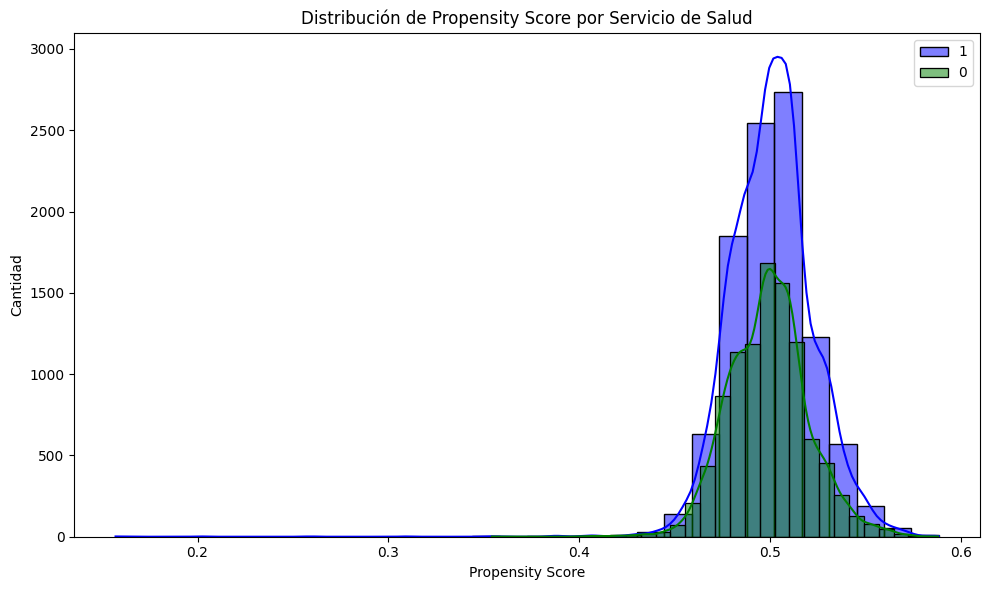

In [214]:
plt.figure(figsize=(10, 6))

es_metropolitano = [1, 0]

for es_servicio_metropolitano, color in zip(es_metropolitano, ['blue', 'green']):
    subset = muestra[muestra['ES_METROPOLITANO'] == es_servicio_metropolitano]
    sns.histplot(subset['propensity_score'], kde=True, bins=30, color=color, label=es_servicio_metropolitano, alpha=0.5)
plt.xlabel('Propensity Score')
plt.ylabel('Cantidad')
plt.title('Distribución de Propensity Score por Servicio de Salud')
plt.legend()
plt.tight_layout()
plt.show()

## Realizamos matching

In [215]:
# 5. Función para realizar matching
def match_propensity_scores(df, treatment_col='tratamiento', score_col='propensity_score', caliper=0.05):
    """
    Realiza matching por propensity score con un caliper dado.

    Parámetros:
    -----------
    df : DataFrame
        DataFrame con los datos
    treatment_col : str
        Nombre de la columna que indica el tratamiento (1) o control (0)
    score_col : str
        Nombre de la columna con propensity scores
    caliper : float
        Distancia máxima permitida para el matching

    Retorna:
    --------
    DataFrame con los pares matcheados
    """
    # Separar tratamiento y control
    treated = df[df[treatment_col] == 1].copy()
    control = df[df[treatment_col] == 0].copy()

    # Almacenar índices de matches (usar índices originales)
    treated_indices = []
    control_indices = []

    # Para cada caso tratado, encontrar el control más cercano
    available_controls = control.copy()
    for treated_idx, treated_row in treated.iterrows():
        ps_treated = treated_row[score_col]
        available_controls['distance'] = abs(available_controls[score_col] - ps_treated)

        # Si hay controles disponibles
        if not available_controls.empty:
            best_match_idx = available_controls['distance'].idxmin()
            best_match_distance = available_controls.loc[best_match_idx, 'distance']

            # Verificar caliper
            if best_match_distance < caliper:
                treated_indices.append(treated_idx)
                control_indices.append(best_match_idx)

                # Eliminar el control usado para no reutilizarlo
                available_controls = available_controls.drop(best_match_idx)

    # Crear DataFrame con los pares matcheados usando los índices originales
    matched_treated = treated.loc[treated_indices].reset_index(drop=True)
    matched_control = control.loc[control_indices].reset_index(drop=True)

    return matched_treated, matched_control

# 6. Realizar el matching
treated_matched, control_matched = match_propensity_scores(muestra, "ES_METROPOLITANO")
print(f"Número de pares matcheados: {len(treated_matched)}")

Número de pares matcheados: 9938


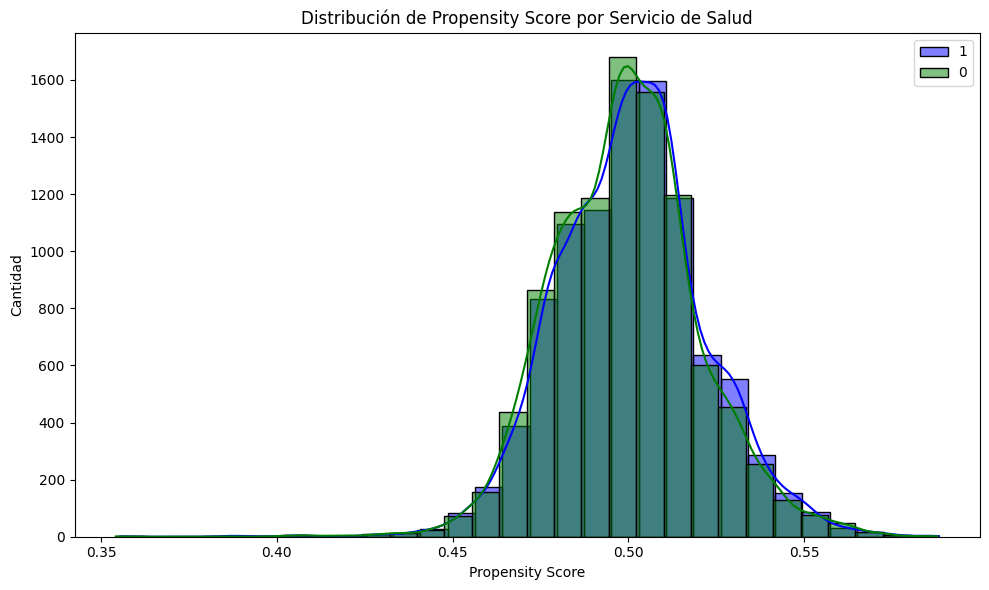

In [216]:
muestra_matched = pd.concat([treated_matched, control_matched])

plt.figure(figsize=(10, 6))

es_metropolitano = [1, 0]

for es_servicio_metropolitano, color in zip(es_metropolitano, ['blue', 'green']):
    subset = muestra_matched[muestra_matched['ES_METROPOLITANO'] == es_servicio_metropolitano]
    sns.histplot(subset['propensity_score'], kde=True, bins=30, color=color, label=es_servicio_metropolitano, alpha=0.5)
plt.xlabel('Propensity Score')
plt.ylabel('Cantidad')
plt.title('Distribución de Propensity Score por Servicio de Salud')
plt.legend()
plt.tight_layout()
plt.show()

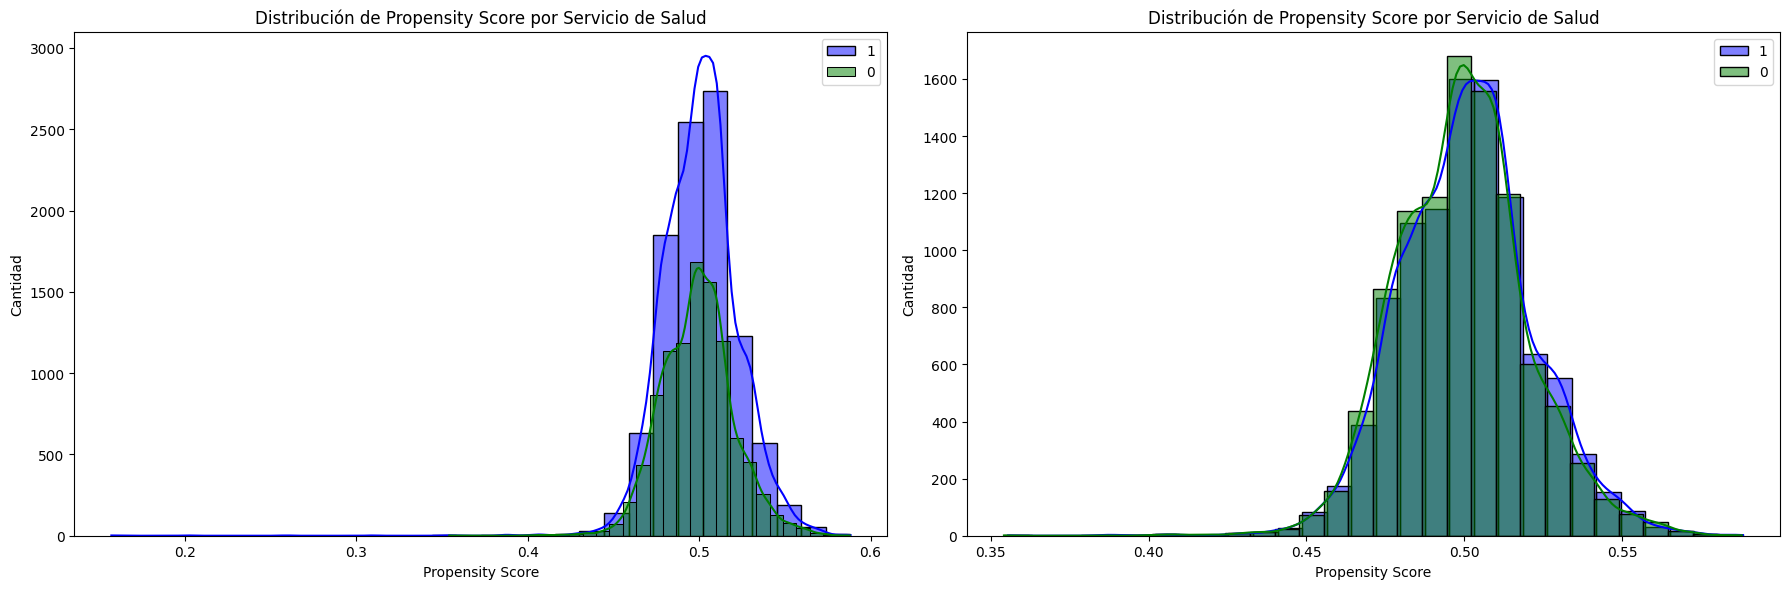

In [217]:
# 7. Visualizar distribución de propensity scores antes y después del matching
plt.figure(figsize=(18, 6))

# Antes del matching
plt.subplot(1, 2, 1)
for es_servicio_metropolitano, color in zip(es_metropolitano, ['blue', 'green']):
    subset = muestra[muestra['ES_METROPOLITANO'] == es_servicio_metropolitano]
    sns.histplot(subset['propensity_score'], kde=True, bins=30, color=color, label=es_servicio_metropolitano, alpha=0.5)
plt.xlabel('Propensity Score')
plt.ylabel('Cantidad')
plt.title('Distribución de Propensity Score por Servicio de Salud')
plt.legend()
plt.tight_layout()

# Después del matching
plt.subplot(1, 2, 2)
for es_servicio_metropolitano, color in zip(es_metropolitano, ['blue', 'green']):
    subset = muestra_matched[muestra_matched['ES_METROPOLITANO'] == es_servicio_metropolitano]
    sns.histplot(subset['propensity_score'], kde=True, bins=30, color=color, label=es_servicio_metropolitano, alpha=0.5)
plt.xlabel('Propensity Score')
plt.ylabel('Cantidad')
plt.title('Distribución de Propensity Score por Servicio de Salud')
plt.legend()
plt.tight_layout()

plt.tight_layout()
plt.show()